#### Import Depenedancies 

In [57]:
from pydantic import BaseModel, Field

from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode

from langchain_core.messages import AIMessage, ToolMessage
from langchain_core.messages import convert_to_openai_messages

from jinja2 import Template
from typing import Literal, Dict, Any, Annotated, List
from IPython.display import Image, display
from operator import add
from openai import OpenAI

import random
import ast
import inspect
import instructor
import json



### Single Node Graph

In [58]:
class State(BaseModel): 
    """State for the single node graph"""
    message: str
    answer: str = ""
    vibe: str 

In [59]:
def append_vibes_to_query(state:State) -> dict():
    return {
    "answer": f"{state.message}{state.vibe}"
    }

In [60]:
workflow = StateGraph(State)
workflow.add_node("append_vibes_to_query",append_vibes_to_query)

workflow.add_edge(START, "append_vibes_to_query")
workflow.add_edge("append_vibes_to_query",END)

graph = workflow.compile()

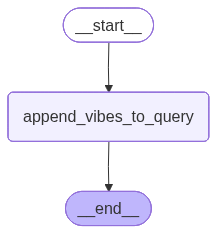

In [61]:
display(Image(graph.get_graph().draw_mermaid_png()))


In [62]:
initial_state = {
    "message": "Give me some vibes!",
    "vibe": "I'm feeling like a awesome today!"
}

In [63]:
result = graph.invoke(initial_state)


In [64]:
result

{'message': 'Give me some vibes!',
 'answer': "Give me some vibes!I'm feeling like a awesome today!",
 'vibe': "I'm feeling like a awesome today!"}

#### Conditional Graph


In [65]:
class State(BaseModel):
    message: str
    answer: str = ""

In [66]:
def append_vibes_to_query(state: State) -> dict:

    return {
        "answer": "I am here to add some vibes:"
        }

In [67]:
def router(state: State) -> Literal["append_vibe_1", "append_vibe_2", "append_vibe_3"]:

    vibes = ["append_vibe_1", "append_vibe_2", "append_vibe_3"]

    vibe_path = random.choice(vibes)

    return vibe_path

In [68]:
def append_vibe_1(state: State) -> dict:

    vibe = "I'm feeling like a badass today!"

    return {
        "answer": f"{state.answer} {state.message} {vibe}"
        }

def append_vibe_2(state: State) -> dict:

    vibe = "I'm feeling like a boss today!"

    return {
        "answer": f"{state.answer} {state.message} {vibe}"
        }

def append_vibe_3(state: State) -> dict:

    vibe = "I'm feeling like a legend today!"

    return {
        "answer": f"{state.answer} {state.message} {vibe}"
        }

In [69]:
workflow = StateGraph(State)
workflow.add_node("append_vibes_to_query", append_vibes_to_query)
workflow.add_node("append_vibe_1", append_vibe_1)
workflow.add_node("append_vibe_2",append_vibe_2)
workflow.add_node("append_vibe_3",append_vibe_3)

#create conditional edge

workflow.add_edge(START,"append_vibes_to_query")
workflow.add_conditional_edges(
    "append_vibes_to_query",
    router
)

workflow.add_edge("append_vibe_1",END)
workflow.add_edge("append_vibe_2",END)
workflow.add_edge("append_vibe_3",END)

graph = workflow.compile()




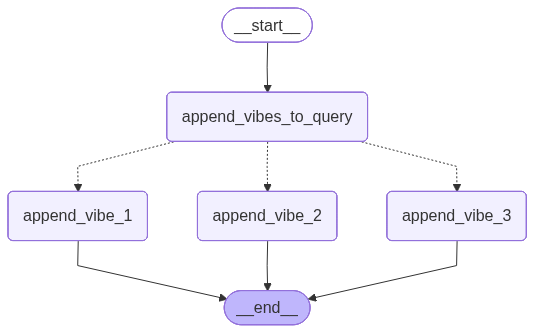

In [70]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [71]:
initial_state = {"message":"Give me some vibes!"}


In [83]:
result = graph.invoke(initial_state)

In [84]:
result

{'message': 'Give me some vibes!',
 'answer': "I am here to add some vibes: Give me some vibes! I'm feeling like a boss today!"}